# Automatic Fraud Detection

In [43]:
import pandas as pd 
import numpy as np 
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

## ETL

In [5]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
print(f"There are {df.isnull().sum().sum()} missing values in the dataset.")

There are 0 missing values in the dataset.


In [27]:
fraud_prop = (df["Class"] == 1).sum()/len(df)
print(f"Fraud in the dataset : {fraud_prop}.")
print(f"No fraud in the dataset : {1-fraud_prop}.")

if fraud_prop < 0.4: 
    print("The dataset is imbalanced.")
else: 
    print("The dataset is balanced.")

Fraud in the dataset : 0.001727485630620034.
No fraud in the dataset : 0.9982725143693799.
The dataset is imbalanced.


<Axes: xlabel='Class', ylabel='count'>

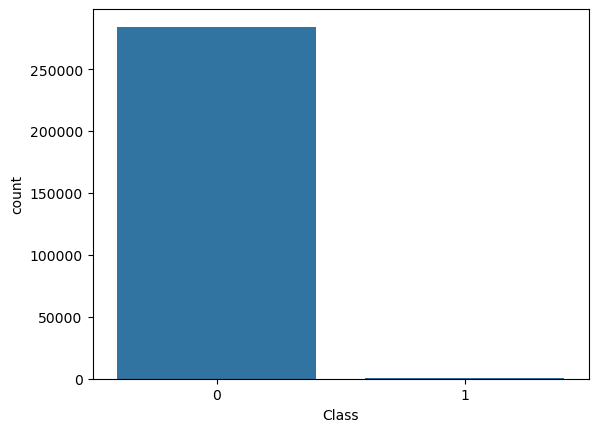

In [41]:
sns.countplot(data=df, x="Class")

/var/folders/4k/zr6f6l1933lg2p62yd9q0dn80000gn/T/ipykernel_4093/461151540.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount, ax=ax[0], color='r')
/var/folders/4k/zr6f6l1933lg2p62yd9q0dn80000gn/T/ipykernel_4093/461151540.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time, ax=ax[1],

Text(0.5, 1.0, 'Distribution of transaction time')

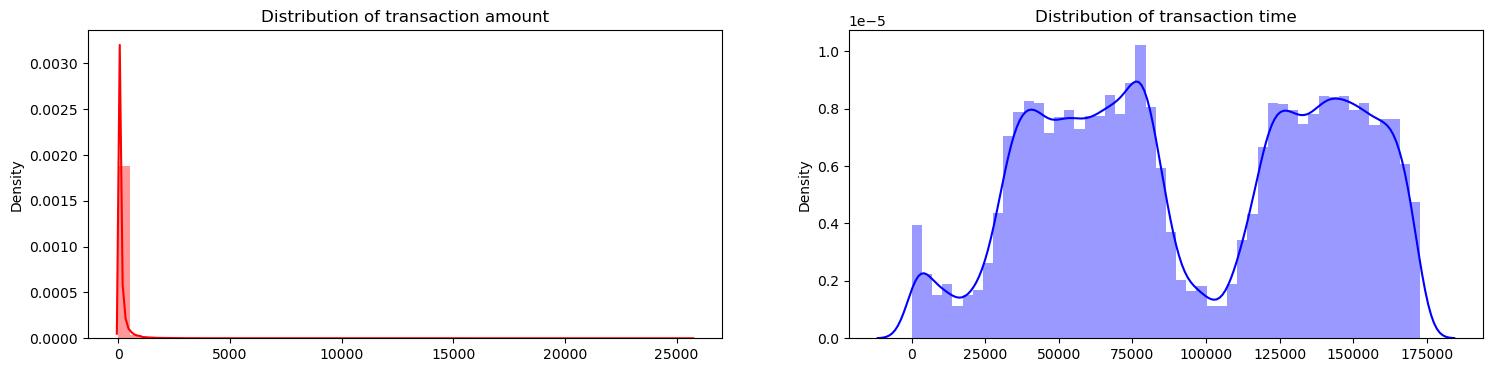

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount = df["Amount"].values
time = df["Time"].values

sns.distplot(amount, ax=ax[0], color='r')
ax[0].set_title("Distribution of transaction amount")

sns.distplot(time, ax=ax[1], color='b')
ax[1].set_title("Distribution of transaction time")

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["Amount_scaled"] = scaler.fit_transform(df[["Amount"]])
df["Time_scaled"] = scaler.fit_transform(df[["Time"]])

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled,Time_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541
